In [1]:
import json
import os
from collections import defaultdict

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import rcParams

from draw import *
from sod import *

In [2]:
datasets = [
    "contact-primary-school",
    "contact-high-school",
    "hospital-lyon",
    "email-enron",
    "email-eu",
    "diseasome",
    "disgenenet",
    "ndc-substances",
    "congress-bills",
    "tags-ask-ubuntu",
][::-1]
measures = ["sf", "es", "fes"]
measure_labels = [
    "Simplicial Fraction",
    "Edit Simpliciality",
    "Face Edit Simpliciality",
]

In [3]:
datasets

['tags-ask-ubuntu',
 'congress-bills',
 'ndc-substances',
 'disgenenet',
 'diseasome',
 'email-eu',
 'email-enron',
 'hospital-lyon',
 'contact-high-school',
 'contact-primary-school']

In [4]:
data_simpliciality = defaultdict(list)
cl_simpliciality = defaultdict(list)
cm_simpliciality = defaultdict(list)
dcsbm_simpliciality = defaultdict(list)

for dataset in datasets:
    with open(f"Data/model_simpliciality_{dataset}.json", "r") as file:
        synthetic_data = json.loads(file.read())

    with open(f"Data/empirical_simpliciality.json", "r") as file:
        empirical_data = json.loads(file.read())

    labels = []

    for m in measures:
        data_simpliciality[m].append(empirical_data[dataset][m])
        cl_simpliciality[m].append(synthetic_data["CL"][m])
        cm_simpliciality[m].append(synthetic_data["CM"][m])
        dcsbm_simpliciality[m].append(synthetic_data["DCSBM"][m])

In [5]:
set_fonts()
color_palette = ["#59C6DA", "#5986DA", "#59DAAD"]

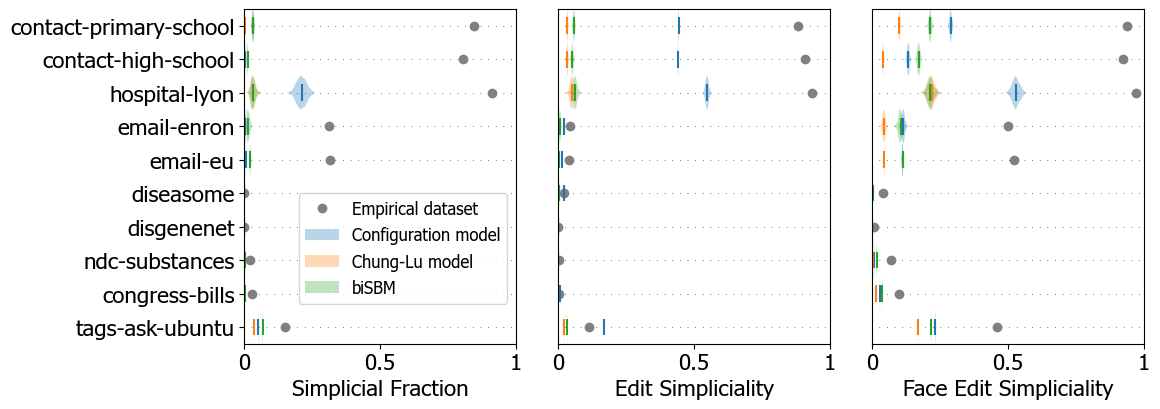

In [6]:
def add_patch(legend, colors, titles):
    from matplotlib.patches import Patch

    ax = legend.axes

    handles, labels = ax.get_legend_handles_labels()
    for c in colors:
        handles.append(Patch(facecolor=c, edgecolor=None))
    for t in titles:
        labels.append(t)

    legend._legend_box = None
    legend._init_legend_box(handles, labels)
    legend._set_loc(legend._loc)
    legend.set_title(legend.get_title().get_text())
    return legend


# plot dashed lines
fig, axes = plt.subplots(1, len(measures), figsize=(12, 4.5))

for i in range(len(measures)):
    m = measures[i]

    # plot dashed lines
    for d in range(len(datasets)):
        axes[i].plot(
            [0, 1], [d, d], linestyle=(1, (1, 10)), linewidth=0.5, color="black"
        )

    # configure axes
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([-0.5, len(datasets) - 0.5])
    axes[i].set_xticks([0, 0.5, 1], [0, 0.5, 1])
    axes[i].set_xlabel(measure_labels[i])

    if i != 0:
        axes[i].set_yticks([], [])

    # plot empirical simpliciality
    s1 = axes[i].plot(
        data_simpliciality[m],
        datasets,
        marker="o",
        linestyle="",
        color="grey",
        markersize=6,
        label="Empirical dataset",
    )

    # violin plots
    vp1 = axes[i].violinplot(
        cm_simpliciality[m],
        range(len(datasets)),
        vert=False,
        widths=1,
        showextrema=False,
        showmeans=True,
    )

    vp2 = axes[i].violinplot(
        cl_simpliciality[m],
        range(len(datasets)),
        vert=False,
        widths=1,
        showextrema=False,
        showmeans=True,
    )

    vp3 = axes[i].violinplot(
        dcsbm_simpliciality[m],
        range(len(datasets)),
        vert=False,
        widths=1,
        showextrema=False,
        showmeans=True,
    )

lgd = axes[0].legend(loc=(0.2, 0.12))

colors = [
    vp1["bodies"][0].get_facecolor().flatten(),
    vp2["bodies"][0].get_facecolor().flatten(),
    vp3["bodies"][0].get_facecolor().flatten(),
]
labels = ["Configuration model", "Chung-Lu model", "biSBM"]
add_patch(lgd, colors, labels)

plt.tight_layout()
plt.savefig("Figures/Fig2/model_fitting.png", dpi=1000)
plt.savefig("Figures/Fig2/model_fitting.pdf", dpi=1000)
plt.show()